# NRR Quadrant

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [2]:
gray_canvas = np.zeros((250, 250), np.uint8)
colored_canvas = np.zeros((250,250,3), np.uint8)

In [6]:
optic_disc = cv2.ellipse(deepcopy(gray_canvas),
                        (int(gray_canvas.shape[1]/2), int(gray_canvas.shape[0]/2)),
                        (80,100),
                        0, 0, 360, 255, -1)
optic_cup = cv2.circle(deepcopy(gray_canvas),
                      (50, 150),
                      15, 255, -1)

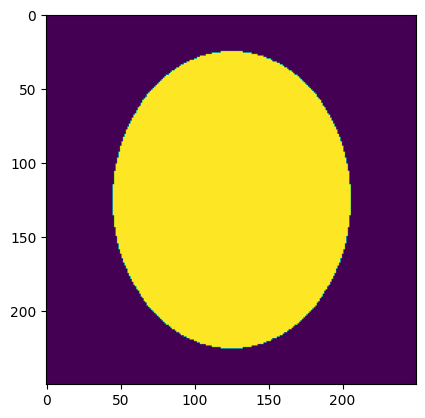

In [7]:
plt.imshow(optic_disc)

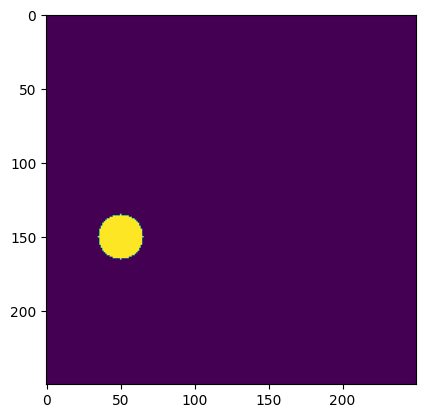

In [8]:
plt.imshow(optic_cup)

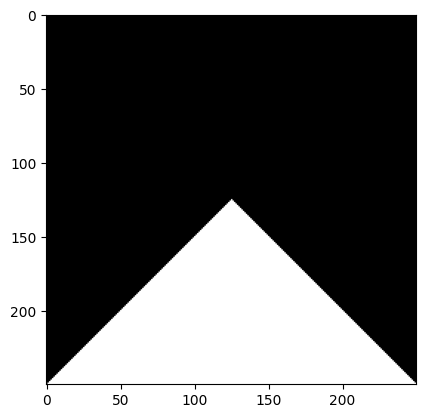

In [9]:
colored_triangle = np.array([
    [0, 250],
    [125, 125],
    [250, 250]
])

res = cv2.fillPoly(deepcopy(colored_canvas), [colored_triangle],(255, 255, 255))
plt.imshow(res)

In [13]:
def generate_masks(img_shapes):
    canvas = np.zeros(img_shapes, np.uint8)
    masks = [0,0,0,0]
    triangle_pts = np.array([
        [0, img_shapes[1]],
        [int(img_shapes[1]/2), int(img_shapes[0]/2)],
        [img_shapes[1], img_shapes[1]]
    ])
    masks[0] = cv2.fillPoly(canvas, [triangle_pts],(255, 255, 255))
    angle = 90
    for i in range(1, 4):
        rotation_m = cv2.getRotationMatrix2D((int(masks[0].shape[1]/2), int(masks[0].shape[1])/2), angle, 1.0)
        rotated = cv2.warpAffine(masks[0], rotation_m, (masks[0].shape[1], masks[0].shape[0]))
        masks[i] = rotated
        angle+=90
    return masks
    
def nrr_quadrant(od, oc):
    masks = generate_masks(od.shape) #  I, N, S, T
    neuroretinal = cv2.subtract(od, oc)
    quadrant_width = [0, 0, 0, 0]
    for i in range(len(masks)):
        masked = cv2.bitwise_and(neuroretinal, masks[i], masks[i])
        ret,binary = cv2.threshold(masked, 127, 255, cv2.THRESH_BINARY)
        contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        x,y,w,h = cv2.boundingRect(contours[0])
        plt.imshow(masked)
        if i%2 == 0:
            quadrant_width[i] = h
        else:
            quadrant_width[i] = w
    return quadrant_width

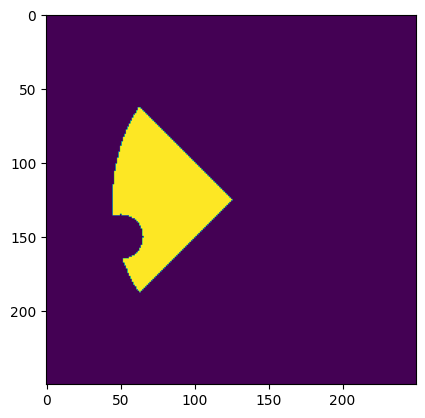

In [14]:
nrr_width = nrr_quadrant(optic_disc, optic_cup)

In [15]:
print(nrr_width)

[101, 81, 101, 81]
